In [1]:
# Load the data
import pandas as pd

data = pd.read_csv("../data/B_Relabelled.csv", index_col=0)

# Part (a)

We can search for each class label:

In [2]:
import numpy as np

for label in data["classification"].unique():
    if np.isnan(label):
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data["classification"].isna())}'
        )
    else:
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data["classification"] == label)}'
        )

Number of entries classified as class nan: 20
Number of entries classified as class 1.0: 179
Number of entries classified as class 2.0: 157
Number of entries classified as class 4.0: 72


# Part (b)

In [3]:
import sys

sys.path.append("..")
from src.preprocessing import DuplicateRemover

# Use module for duplicate removing
remove_dup = DuplicateRemover()
data_removed = data.copy()
data_removed = remove_dup.fit_transform(
    data_removed.iloc[:, :-1], data_removed.iloc[:, -1].values
)

# Restructure dataset
data_removed = pd.DataFrame(
    np.hstack([data_removed[0], data_removed[1].reshape(-1, 1)]), columns=data.columns
)

Removed 20 duplicate rows


Let us look at the consequent label distribution:

In [4]:
for label in data_removed["classification"].unique():
    if np.isnan(label):
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data_removed["classification"].isna())}'
        )
    else:
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data_removed["classification"] == label)}'
        )

Number of entries classified as class nan: 30
Number of entries classified as class 1.0: 164
Number of entries classified as class 2.0: 149
Number of entries classified as class 4.0: 65


# Part (c)

In [5]:
from scipy.stats import ks_2samp

for col in data.columns[:-1]:
    # Use Kolmogorov-Smirnov test to test whether the distributions are similar
    # This gives us information on whether the labels are MAR
    pval = ks_2samp(data[col], data[col][data["classification"].isna()]).pvalue
    if pval < 0.05:
        print(col, pval)

Fea64 0.035798196564276914
Fea343 0.02915706382784225
Fea420 0.03710210101305612


We hence check whether the above 3 features are visually similar to the dataset to verify
if we can assume that our data is MAR.

Text(0.5, 0.98, 'Distributions of rejected features')

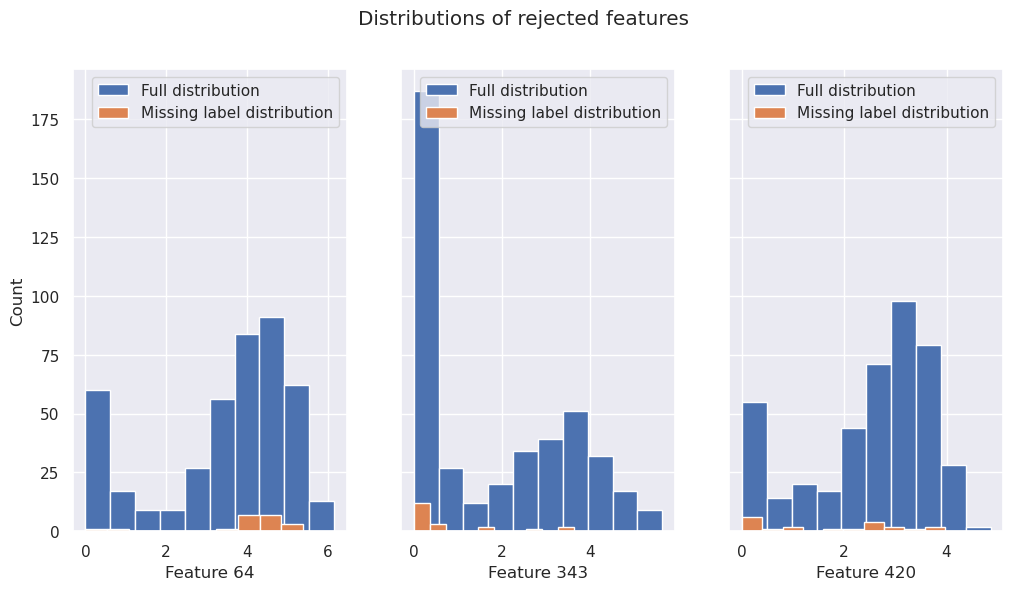

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
ax[0].hist(data["Fea64"], label="Full distribution")
ax[0].hist(
    data["Fea64"][data["classification"].isna()], label="Missing label distribution"
)
ax[0].set_xlabel("Feature 64")
ax[0].set_ylabel("Count")
ax[0].legend()
ax[1].hist(data["Fea343"], label="Full distribution")
ax[1].hist(
    data["Fea343"][data["classification"].isna()], label="Missing label distribution"
)
ax[1].set_xlabel("Feature 343")
ax[1].legend()
ax[2].hist(data["Fea420"], label="Full distribution")
ax[2].hist(
    data["Fea420"][data["classification"].isna()], label="Missing label distribution"
)
ax[2].set_xlabel("Feature 420")
ax[2].legend()
plt.suptitle("Distributions of rejected features")

# Part (d)

In [7]:
import sys

sys.path.append("..")
from src.preprocessing import LabelImputer

label_imputer = LabelImputer()
X = data_removed.iloc[:, :-1].values
y = data_removed.iloc[:, -1].values
# Impute labels
data_removed["classification"] = label_imputer.fit_transform(X, y)

We can now verify that the class distribution is well preserved.

In [8]:
for label in data_removed["classification"].unique():
    if np.isnan(label):
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data_removed["classification"].isna())}'
        )
    else:
        print(
            f'Number of entries classified as class {label}: {np.count_nonzero(data_removed["classification"] == label)}'
        )

Number of entries classified as class 1: 177
Number of entries classified as class 2: 163
Number of entries classified as class 4: 68
